<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


**판다스 매서드**

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,test_size = 0.2, random_state = 42)

In [9]:
print(train_input.shape, train_target.shape)

(5197, 3) (5197,)


In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [12]:
print(lr.coef_, lr.intercept_) # 변수의 coef값을 각 곱하고 intercept 값을 더했을 때 0보다 큰 경우, 작은 경우를 갖고 분류

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


**결정트리**

질문의 y/n으로 구분해 직관적인 해석이 가능

질문을 추가해 분류 정확도를 높일 수 있음

전처리 불필요

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


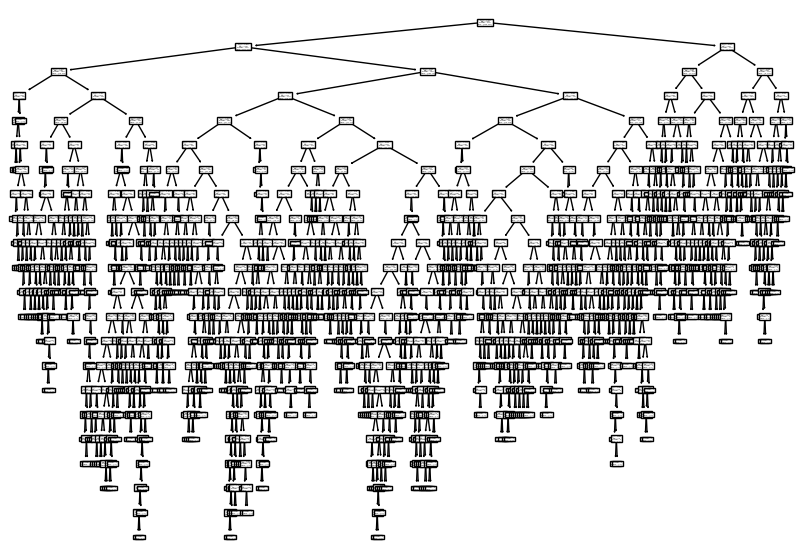

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

**노드**

훈련 데이터의 특성에 대한 테스트를 표현(불리언 값으로 출력)

**트리 해석**

==================

| 테스트 조건(sugar) |

| 불순도(gini)       |

| 총 샘플 수(samples)|

| 클래스 별 샘플 수(value)|

==================

y = 만족 <-> n = 불만족

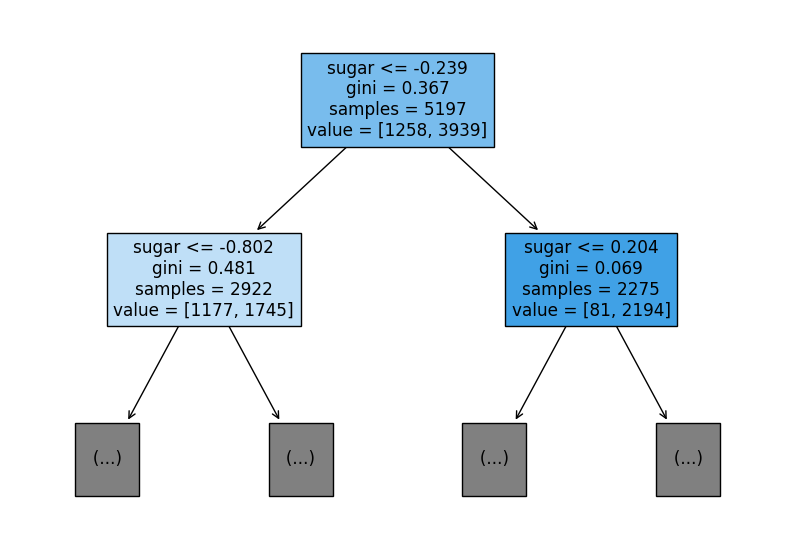

In [15]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH']) # filled = True -> 클래스마다 색깔 부여, 어떤 클래스 비율이 높아지면 진해짐
plt.show()

리프 노드에서 가장 많은 클래스가 예측 클래스가 됨

**불순도(gini impurity)**

1 - 클래스 비율의 제곱합에서

지니 불순도 = 1 - {(음성 클래스 비율)^2 + (양성 클래스 비율)^2}

노드에 하나의 클래스만 있다면 불순도는 0

**정보이득(information gain)**

부모와 자식 노드 사이의 불순도 차이

정보이득이 최대가 되도록 데이터를 분할

**엔트로피 불순도**

DecisionTreeClassifier클래스에서 criterion = 'entropy'

* 기본값 criterion = 'gini'

지니 -> 제곱 / 엔트로피 -> 밑이 2인 log



**가지 치기**

무한히 가지가 생성되는 것을 방지

- 훈련 세트에만 잘 맞고 테스트 세트에서 점수가 낮을 때 -> 일반화가 잘 안됨

In [17]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


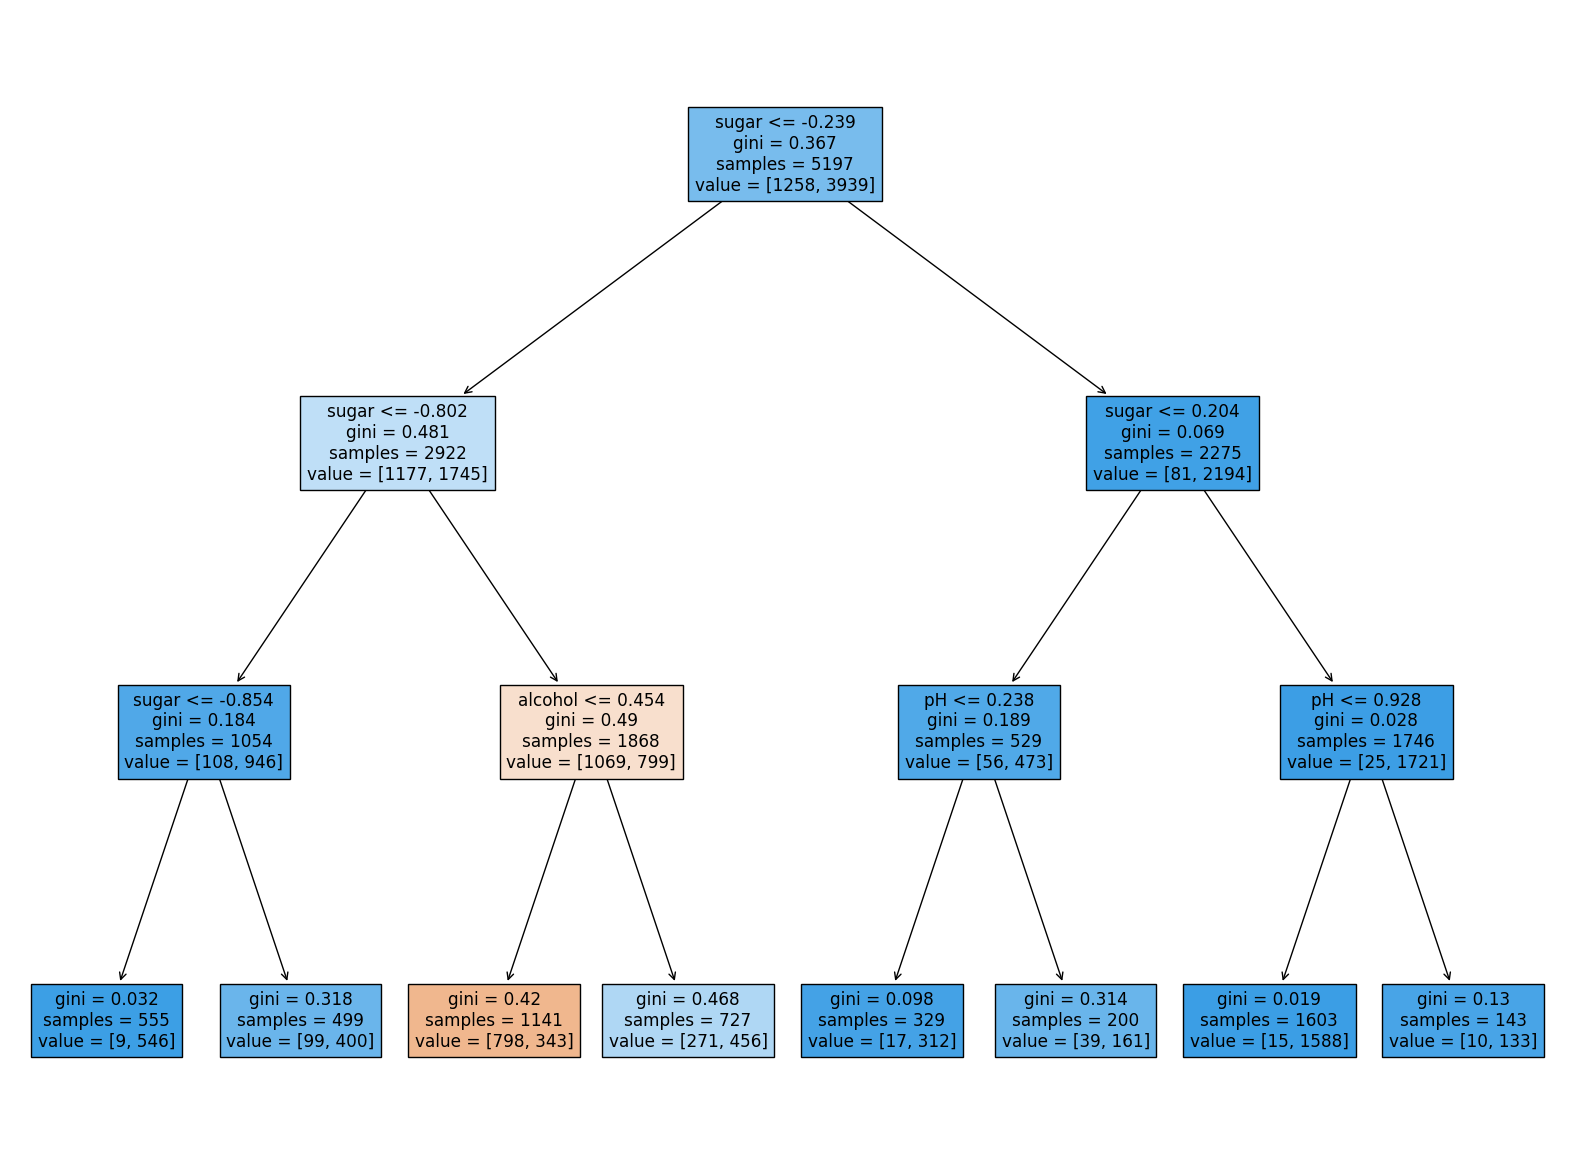

In [18]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

뿌리노드 = 깊이 0

리프노드 = max_depth

In [19]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


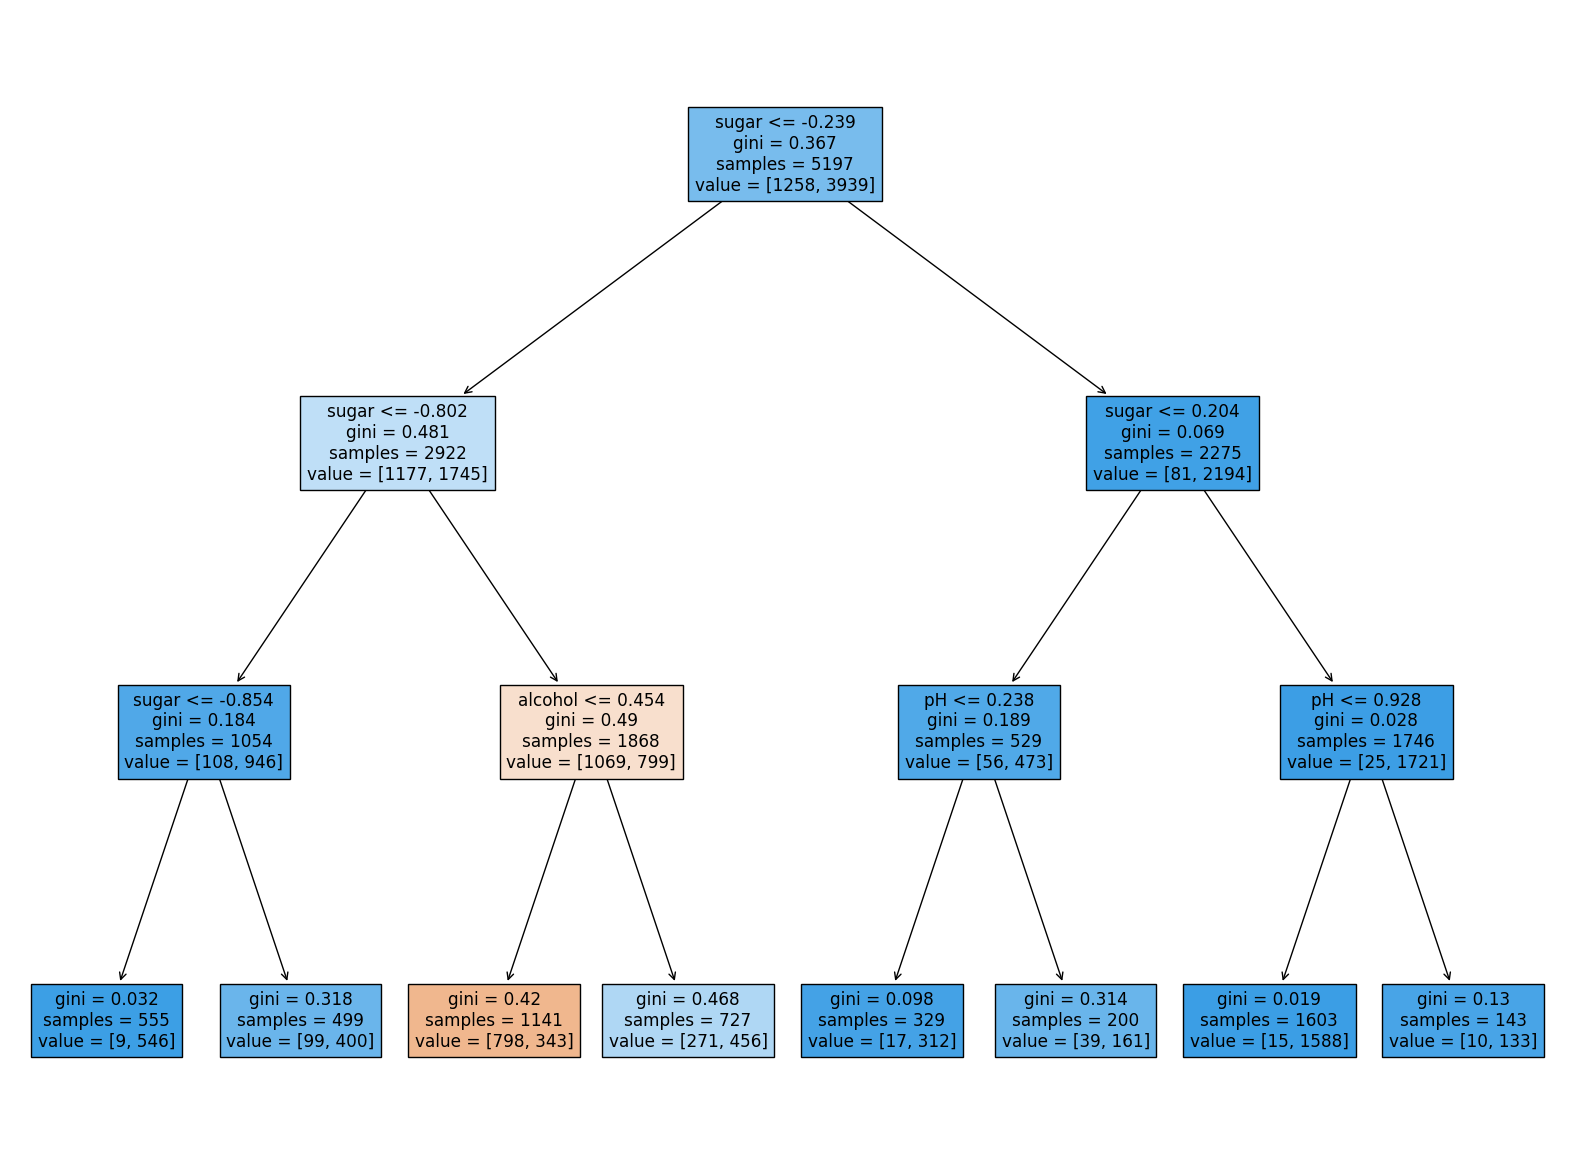

In [21]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True , feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [22]:
print(dt.feature_importances_) # 특성 중요도

[0.12345626 0.86862934 0.0079144 ]


dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)

min_impurity_decrease = 0.0005 -> 가지치기 매개변수

어떤 노드의 정보이득 * 노드의 샘플 수 / (전체 샘플 수) -> 값이 이 매개변수보다 작으면 더 이상 분할하지 않음

0.8874350586877044
0.8615384615384616


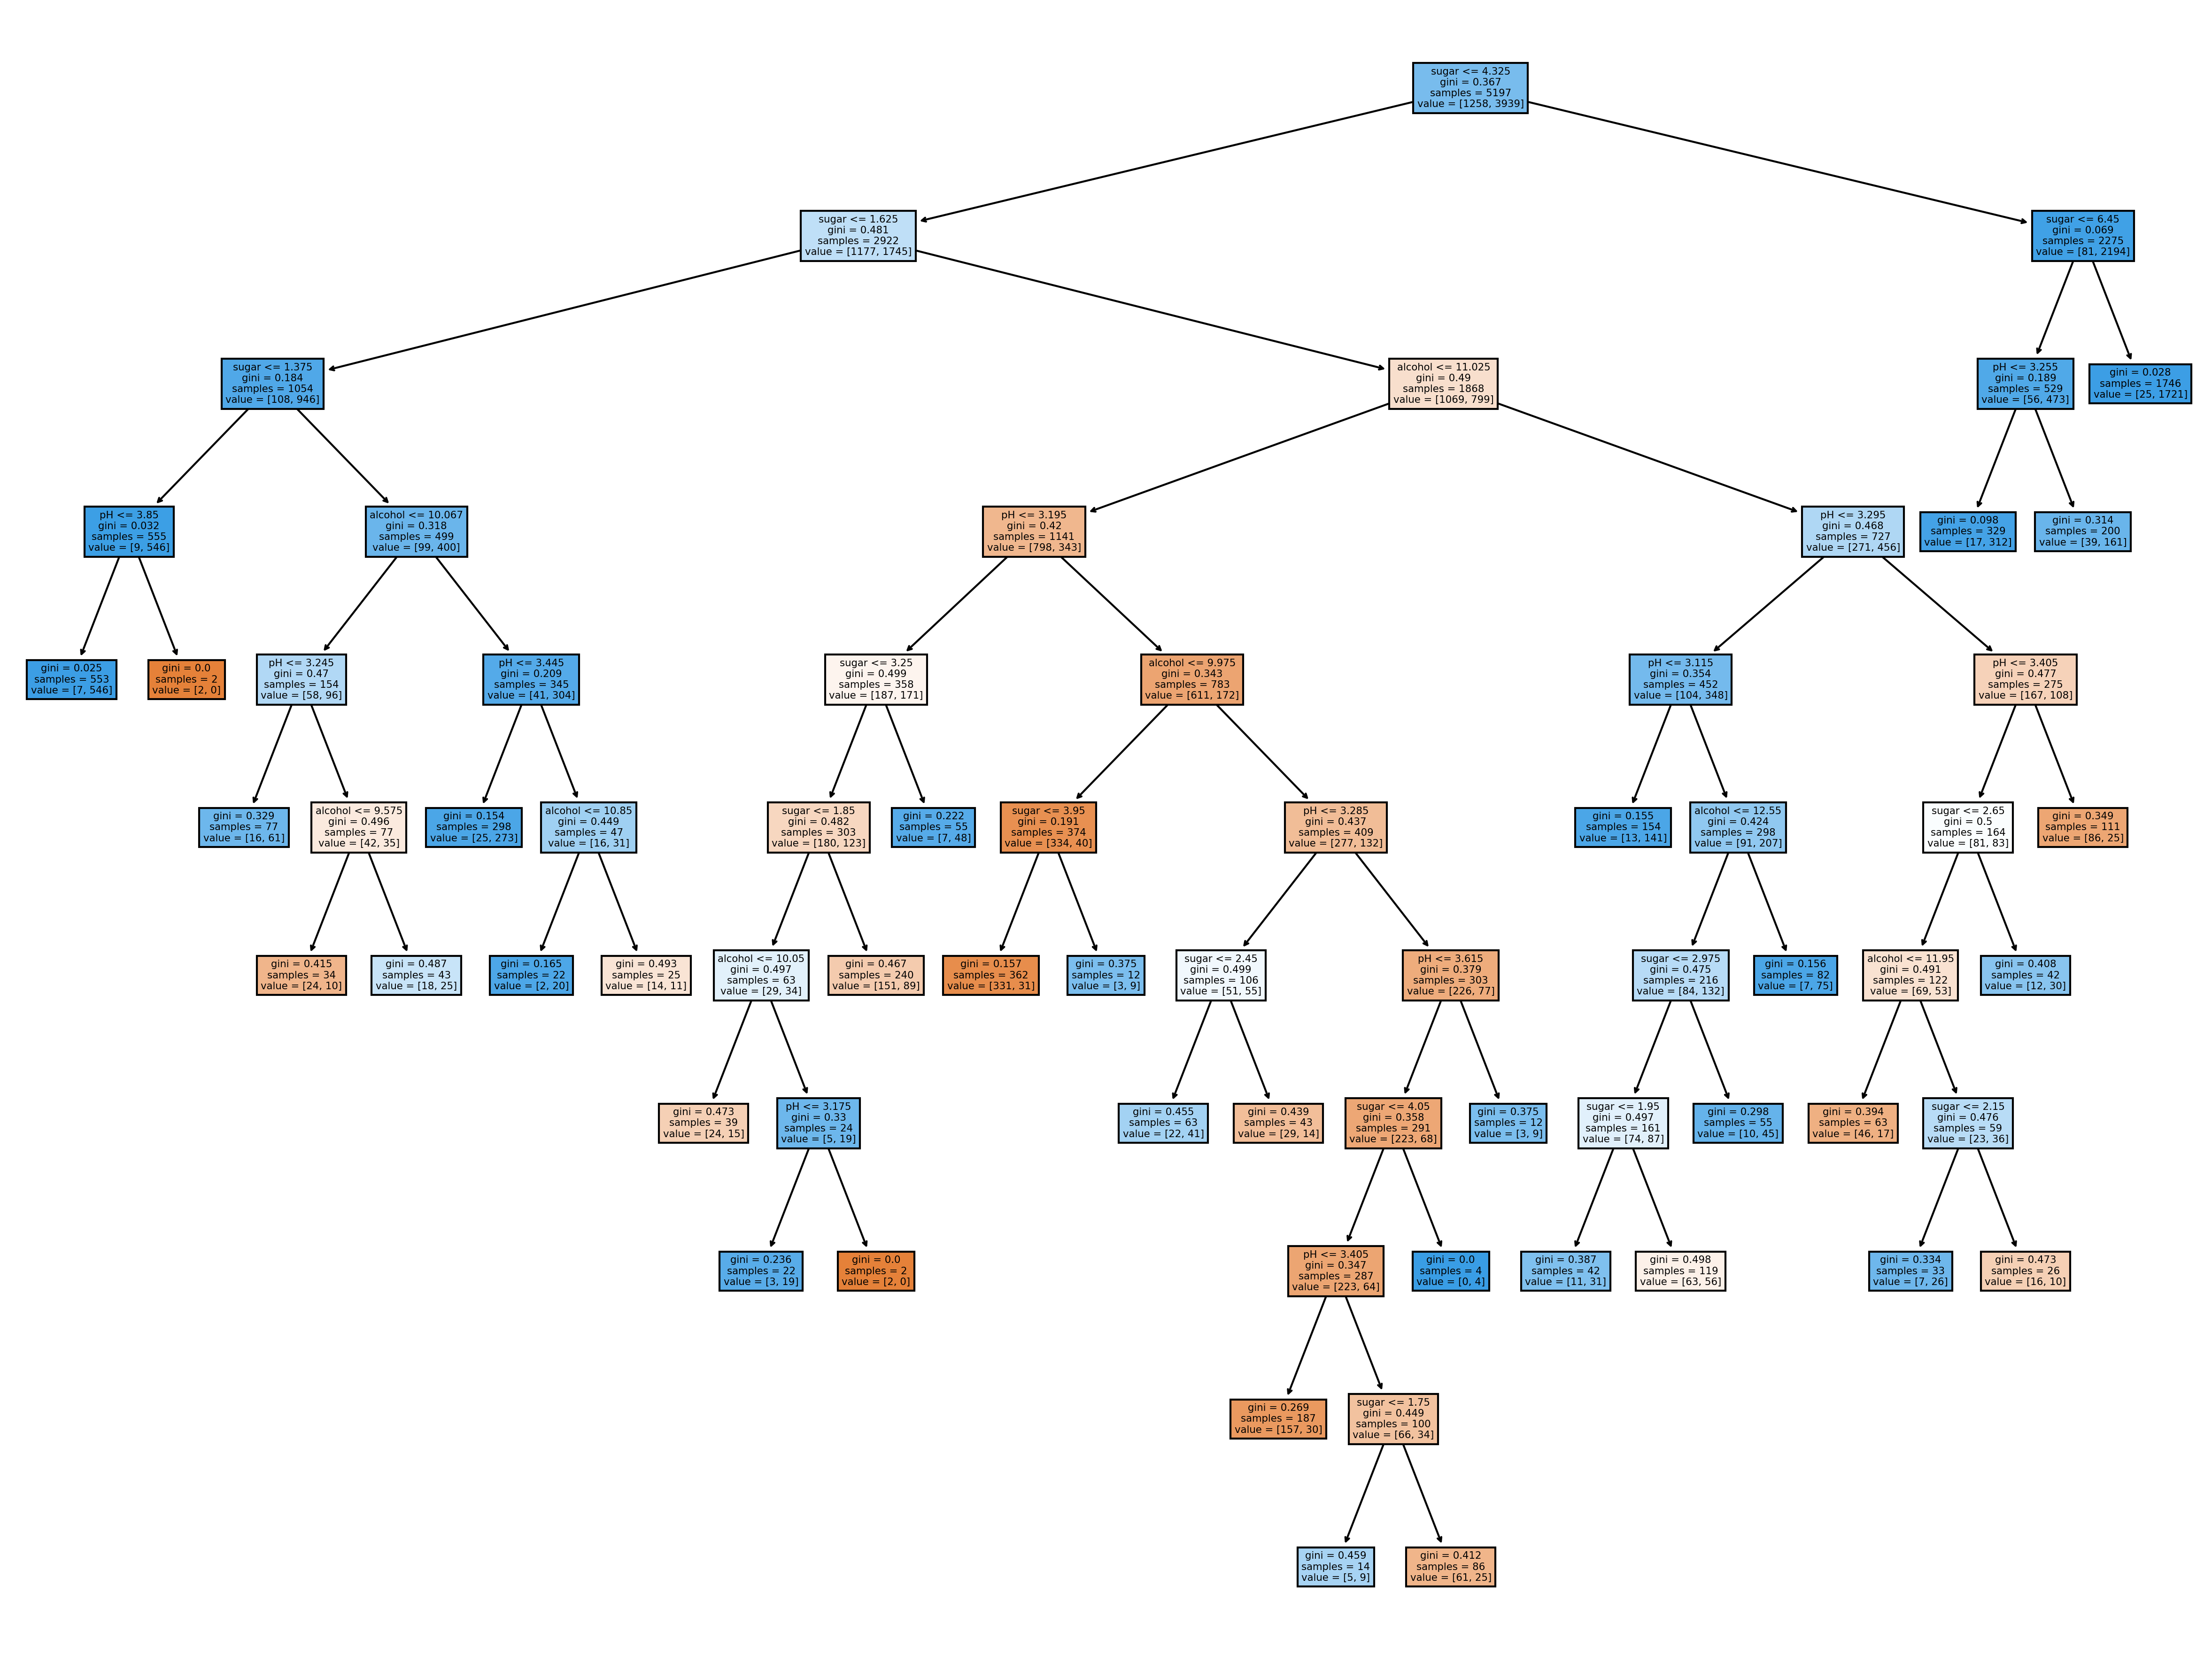

In [23]:
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42) # 가지치기
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize = (20,15), dpi = 300)
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()